In [52]:
# misc
import wget
import pandas as pd
from pprint import pprint
import numpy as np

# graphing
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,classification_report
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve
from sklearn.learning_curve import learning_curve
from sklearn import preprocessing

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

**Challenge 1** / **Challenge 2**

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

For each, draw the Precision-Recall curve, ROC curve and calculate the AUC.

In [2]:
# congress_voting_data = wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",out="congress_data.csv")

In [3]:
col_names = ["Party",
             'Vote1',
             'Vote2',
             'Vote3',
             'Vote4',
             'Vote5',
             'Vote6',
             'Vote7',
             'Vote8',
             'Vote9',
             'Vote10',
             'Vote11',
             'Vote12',
             'Vote13',
             'Vote14',
             'Vote15',
             'Vote16']

congress_votes_df = pd.read_csv("congress_data.csv",
                                names = col_names)

congress_votes_df.head(1)

,Party,Vote1,Vote2,Vote3,Vote4,Vote5,Vote6,Vote7,Vote8,Vote9,Vote10,Vote11,Vote12,Vote13,Vote14,Vote15,Vote16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y


In [4]:
# Changing 1 to yes and 0 to no
change_yes_no = {"y":1,
                 "n":0}

for col in congress_votes_df.columns[1:]:
    congress_votes_df[col] = congress_votes_df[col].map(change_yes_no)
congress_votes_df.head(1)
# congress_votes_df.info()

,Party,Vote1,Vote2,Vote3,Vote4,Vote5,Vote6,Vote7,Vote8,Vote9,Vote10,Vote11,Vote12,Vote13,Vote14,Vote15,Vote16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0


In [5]:
congress_votes_df.fillna(congress_votes_df.mean(),inplace=True)
congress_votes_df.head(1)

,Party,Vote1,Vote2,Vote3,Vote4,Vote5,Vote6,Vote7,Vote8,Vote9,Vote10,Vote11,Vote12,Vote13,Vote14,Vote15,Vote16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.362319,1.0,1.0,1.0,0.0,1.0


GaussianNB
             precision    recall  f1-score   support

          0       0.92      0.99      0.95        77
          1       0.98      0.87      0.92        54

avg / total       0.94      0.94      0.94       131

SVC
             precision    recall  f1-score   support

          0       0.95      0.97      0.96        77
          1       0.96      0.93      0.94        54

avg / total       0.95      0.95      0.95       131

DecisionTreeClassifier
             precision    recall  f1-score   support

          0       0.94      0.97      0.96        77
          1       0.96      0.91      0.93        54

avg / total       0.95      0.95      0.95       131

RandomForestClassifier
             precision    recall  f1-score   support

          0       0.94      0.99      0.96        77
          1       0.98      0.91      0.94        54

avg / total       0.96      0.95      0.95       131

LogisticRegression
             precision    recall  f1-score   support

      

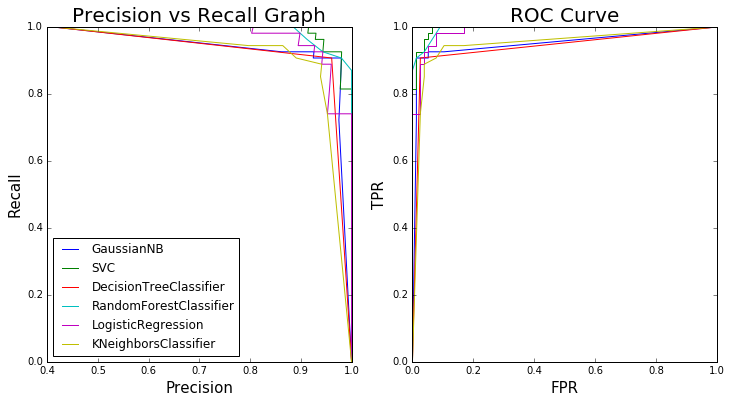

In [23]:
# Reminder : You had to split/train you own set
features = congress_votes_df.iloc[:,1:]
target = congress_votes_df['Party']

label_encoder = preprocessing.LabelEncoder()
target = label_encoder.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.30, random_state=4444)

list_of_model_names = ['GaussianNB','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','KNeighborsClassifier']

list_of_models = [GaussianNB(),SVC(probability=True),DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),
                  KNeighborsClassifier(n_neighbors=6)]

list_of_scores = []
list_of_auc_scores = []

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

for name, model in zip(list_of_models,list_of_model_names):
    name.fit(X_train,y_train)
    y_pred = name.predict(X_test)
    y_pred_probs = name.predict_proba(X_test)
    score = (accuracy_score(y_test, y_pred))
    list_of_scores.append(score)
    
    print(model)
    print(classification_report(y_test, y_pred))
    # Note: 1 = Republican, 0 = Democrat
    precision, recall, thresholds = precision_recall_curve(y_test,[i[1] for i in y_pred_probs])
    
    ax1.plot(precision,recall)
    ax1.legend(list_of_model_names,loc='best')
    ax1.set_title('Precision vs Recall Graph',fontsize=20)
    ax1.set_xlabel('Precision',fontsize=15)
    ax1.set_ylabel('Recall',fontsize=15)
    
    fpr, tpr, thresholds = (roc_curve(y_test,[i[1] for i in y_pred_probs]))
        
    ax2.set_title('ROC Curve',fontsize=20)
    ax2.set_xlabel('FPR',fontsize=15)
    ax2.set_ylabel('TPR',fontsize=15)
    ax2.plot(fpr,tpr)

    list_of_auc_scores.append(roc_auc_score(y_test,[i[1] for i in y_pred_probs]))

auc_answers = pd.DataFrame(list(zip(list_of_model_names, list_of_auc_scores)),columns=['Model_Name','AUC'])
model_answers = pd.DataFrame(list(zip(list_of_model_names, list_of_scores)),columns=['Model_Name','Accuracy_Score'])
print(auc_answers.sort_values(by='AUC',ascending=False))
print('\n')
print(model_answers.sort_values(by='Accuracy_Score',ascending=False))

**Challenge 3**

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9)

In [47]:
list_of_models = [GaussianNB(),SVC(probability=True),DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),
                  KNeighborsClassifier(n_neighbors=6)]

list_of_model_names = ['GaussianNB','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','KNeighborsClassifier']

scording_method = ['accuracy','precision','recall','f1']

frames = []
for name in list_of_models:
    cross_val_mean = []
    for method in scording_method:
        cross_val_mean.append(cross_val_score(name,features,target,scoring=method).mean())
    df = pd.DataFrame(cross_val_mean)
    frames.append(df.transpose())

final_answer = pd.concat(frames)
final_answer.columns = [scording_method]
final_answer.index = list_of_model_names
print(final_answer)

                        accuracy  precision    recall        f1
GaussianNB              0.931034   0.908613  0.916667  0.911185
SVC                     0.954023   0.922271  0.964286  0.942184
DecisionTreeClassifier  0.947126   0.937278  0.952381  0.939054
RandomForestClassifier  0.958621   0.942014  0.946429  0.950357
LogisticRegression      0.960920   0.949399  0.952381  0.950059
KNeighborsClassifier    0.933333   0.897096  0.934524  0.915323


**Challenge 4**

Draw the Precision-Recall curve, ROC curve (and calculate AUC) for the logistic regression classifier from challenge 11 in 05-Classification Challenge that uses [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

In [8]:
# survival_data = wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',out='survival_data.csv')

In [9]:
# 1. Age of patient at time of operation (numerical) 
# 2. Patient's year of operation (year - 1900, numerical) 
# 3. Number of positive axillary nodes detected (numerical) 
# 4. Survival status (class attribute) 
# -- 1 = the patient survived 5 years or longer 
# -- 2 = the patient died within 5 year

breast_cancer_df = pd.read_csv('survival_data.csv', names=['Age','Year_1900','Positive_Aux_Nodes','Survival_Status'])
breast_cancer_df.head(5)

,Age,Year_1900,Positive_Aux_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


LogisticRegression
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        74
          1       1.00      0.06      0.11        18

avg / total       0.85      0.82      0.74        92

           Model_Name       AUC
0  LogisticRegression  0.647523


           Model_Name  Accuracy_Score
0  LogisticRegression        0.815217


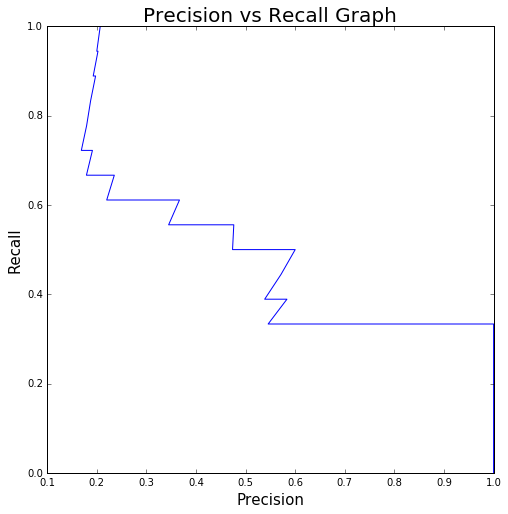

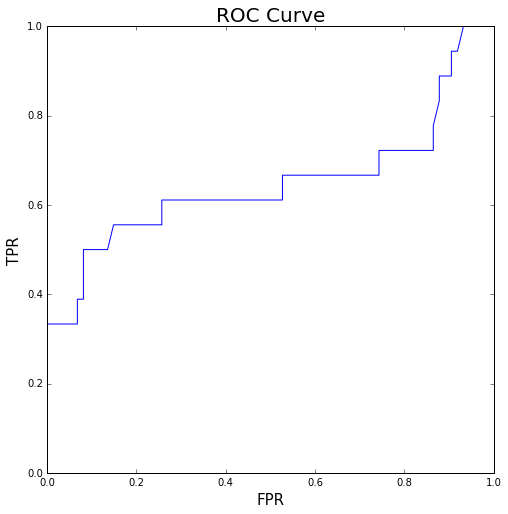

In [10]:
# Reminder : You had to split/train you own set
features = breast_cancer_df.iloc[:,0:3]
target = breast_cancer_df['Survival_Status']

label_encoder = preprocessing.LabelEncoder()
target = label_encoder.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.30, random_state=4444)

list_of_model_names = ['LogisticRegression']

list_of_models = [LogisticRegression()]
list_of_scores = []
list_of_auc_scores = []

plt.figure(figsize=(8,8))
for name, model in zip(list_of_models,list_of_model_names):
    name.fit(X_train,y_train)
    y_pred = name.predict(X_test)
    y_pred_probs = name.predict_proba(X_test)
    score = (accuracy_score(y_test, y_pred))
    list_of_scores.append(score)
    
    print(model)
    print(classification_report(y_test, y_pred))
    # Note: 1 = Republican, 0 = Democrat
    precision, recall, thresholds = precision_recall_curve(y_test,[i[1] for i in y_pred_probs])
    
    plt.plot(precision,recall)
    plt.title('Precision vs Recall Graph',fontsize=20)
    plt.xlabel('Precision',fontsize=15)
    plt.ylabel('Recall',fontsize=15)

    list_of_auc_scores.append(roc_auc_score(y_test,[i[1] for i in y_pred_probs]))
    
    fpr, tpr, thresholds = (roc_curve(y_test,[i[1] for i in y_pred_probs]))
    
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve',fontsize=20)
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.plot(fpr,tpr)

auc_answers = pd.DataFrame(list(zip(list_of_model_names, list_of_auc_scores)),columns=['Model_Name','AUC'])
model_answers = pd.DataFrame(list(zip(list_of_model_names, list_of_scores)),columns=['Model_Name','Accuracy_Score'])
print(auc_answers.sort_values(by='AUC',ascending=False))
print('\n')
print(model_answers.sort_values(by='Accuracy_Score',ascending=False))